In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('compustat_dailly_ratings_1997_02_to_latest.csv')

C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,6,7,8,14,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#splticrm: S&P Domestic Long Term Issuer Credit Rating
#datadate: date bond rating data was collected
#cik: company unique ID
#llc location
#Final data ~3k, most don't have long term ratings, filtered for US companies
df.columns

Index(['gvkey', 'splticrm', 'spsdrm', 'spsticrm', 'datadate', 'add1', 'add2',
       'add3', 'add4', 'addzip', 'busdesc', 'cik', 'city', 'conml', 'county',
       'dlrsn', 'ein', 'fax', 'fic', 'fyrc', 'ggroup', 'gind', 'gsector',
       'gsubind', 'idbflag', 'incorp', 'loc', 'naics', 'phone', 'prican',
       'prirow', 'priusa', 'sic', 'spcindcd', 'spcseccd', 'spcsrc', 'state',
       'stko', 'weburl', 'dldte', 'ipodate', 'conm', 'tic', 'cusip'],
      dtype='object')

In [4]:
df['splticrm'].value_counts()

BBB     60149
B+      48345
BBB+    47786
BBB-    46539
BB-     44129
A-      37203
A       35631
B       34892
BB      34450
BB+     27469
A+      22673
B-      17720
AA-     13008
AA       7409
CCC+     6865
D        5208
AAA      4420
CCC      3515
AA+      2430
CC       1293
CCC-     1126
SD        666
N.M.      182
Name: splticrm, dtype: int64

In [5]:
df['spsdrm'].value_counts()

B-      2383
B       2170
B+      1438
A-      1151
BBB-    1106
BB+      932
BB-      864
BBB      817
BBB+     696
A        518
A+       453
CCC+     423
D        206
AA-      192
CCC      177
AA        76
CCC-      65
AAA       30
CC        22
AA+       20
C         12
BB         5
Name: spsdrm, dtype: int64

In [6]:
df['spsticrm'].value_counts()

A-2     68957
A-1     44184
A-1+    23304
A-3     10871
B        4062
B-2      1128
B-1       744
C         593
B-3       435
D         368
SD         10
Name: spsticrm, dtype: int64

In [7]:
df['spcsrc'].value_counts()

C      395384
B-     251865
B      194856
B+     155963
D      107625
A-      57821
A       42623
A+      12578
LIQ      1248
Name: spcsrc, dtype: int64

In [8]:
lista= ['splticrm','spsdrm','spsticrm','spcsrc']

In [9]:
for i in lista:
    print(i,':',df[i].isnull().sum())

splticrm : 1884358
spsdrm : 2373710
spsticrm : 2232810
spcsrc : 1167503


In [10]:
mask = df['splticrm'].isna() | df['spsticrm'].isna()

In [11]:
df[-mask][['gvkey','splticrm','spsticrm','cik']]

,gvkey,splticrm,spsticrm,cik
1679,1045,B-,B-3,6201.0
1680,1045,B-,B-3,6201.0
1681,1045,B-,B-3,6201.0
1682,1045,B-,B-3,6201.0
1683,1045,B-,B-3,6201.0
...,...,...,...,...
2387171,295786,BB+,B,1567094.0
2387172,295786,BB+,B,1567094.0
2387173,295786,BB+,B,1567094.0
2387174,295786,BB+,B,1567094.0


# Return

In [12]:
returns = pd.read_csv('compustat_daily_prices_1997_02_to_latest.csv')

C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,29,30,33,35,36,45,49,50,51,57,59,67,71,72,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
returns.head()

,gvkey,iid,datadate,tic,cusip,conm,ajexm,ajpm,isalrt,primiss,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,1003,01,19970131,ANTQ,000354100,A.A. IMPORTING CO INC,1.0,1.0,NaN,P,...,1.0,5712.0,449.0,976.0,NaN,MO,3.0,www.aaimporting.com,19920430.0,NaN
1,1003,01,19970228,ANTQ,000354100,A.A. IMPORTING CO INC,1.0,1.0,NaN,P,...,1.0,5712.0,449.0,976.0,NaN,MO,3.0,www.aaimporting.com,19920430.0,NaN
2,1003,01,19970331,ANTQ,000354100,A.A. IMPORTING CO INC,1.0,1.0,NaN,P,...,1.0,5712.0,449.0,976.0,NaN,MO,3.0,www.aaimporting.com,19920430.0,NaN
3,1003,01,19970430,ANTQ,000354100,A.A. IMPORTING CO INC,1.0,1.0,NaN,P,...,1.0,5712.0,449.0,976.0,NaN,MO,3.0,www.aaimporting.com,19920430.0,NaN
4,1003,01,19970531,ANTQ,000354100,A.A. IMPORTING CO INC,1.0,1.0,NaN,P,...,1.0,5712.0,449.0,976.0,NaN,MO,3.0,www.aaimporting.com,19920430.0,NaN


In [14]:
returns['datadate']=(pd.to_datetime(returns['datadate'],format='%Y%m%d'))


In [15]:
returns['month']= returns['datadate'].dt.month
returns['year']= returns['datadate'].dt.year


In [16]:
returns['mkcap']= returns['cshom']* returns['prccm']

In [17]:
# Shift the stock by 1 month
mask = returns['cik']==returns['cik'].shift(-1)
returns['nextmonth_return']= np.where(mask,returns['trt1m'].shift(-1),np.nan)

In [19]:
# returns

In [20]:
returns= returns[['cik','prccm','year','month','datadate','trt1m','cshom','mkcap','tic','nextmonth_return']]

# CIK unique company identifier
# PRCCM close price
# CMTH month, CYEAR year
# datadate
# TRT1M monthly total return: monthly multiplication factor for calculating the total return to shareholders of any time period.
# includes Cash Equivalent Distributions (from 01-31-1982 and forward) along with reinvestment of dividends and the compounding effect of dividends paid on reinvested dividends.
# 'cshom' s/o monthly, 'chsoq' s/o quarterly

In [21]:
returns[returns['tic']=='AAPL']

,cik,prccm,year,month,datadate,trt1m,cshom,mkcap,tic,nextmonth_return
36629,320193.0,16.625,1997,1,1997-01-31,-20.3593,NaN,NaN,AAPL,-2.2556
36630,320193.0,16.250,1997,2,1997-02-28,-2.2556,NaN,NaN,AAPL,12.3077
36631,320193.0,18.250,1997,3,1997-03-31,12.3077,NaN,NaN,AAPL,-6.8493
36632,320193.0,17.000,1997,4,1997-04-30,-6.8493,NaN,NaN,AAPL,-2.2059
36633,320193.0,16.625,1997,5,1997-05-31,-2.2059,NaN,NaN,AAPL,-14.2857
...,...,...,...,...,...,...,...,...,...,...
36902,320193.0,248.760,2019,10,2019-10-31,11.0684,4.443265e+09,1.105307e+12,AAPL,7.7424
36903,320193.0,267.250,2019,11,2019-11-30,7.7424,4.443265e+09,1.187463e+12,AAPL,9.8784
36904,320193.0,293.650,2019,12,2019-12-31,9.8784,4.443265e+09,1.304765e+12,AAPL,5.4010
36905,320193.0,309.510,2020,1,2020-01-31,5.4010,4.375480e+09,1.354255e+12,AAPL,NaN


In [22]:
filtercap= returns['mkcap'].isna()| returns['cik'].isna()

In [23]:
returns= returns[-filtercap]

In [24]:
returns

,cik,prccm,year,month,datadate,trt1m,cshom,mkcap,tic,nextmonth_return
17,730052.0,0.008,2002,6,2002-06-30,NaN,2683000.0,21464.0,ANTQ,-87.5000
18,730052.0,0.001,2002,7,2002-07-31,-87.5000,2683000.0,2683.0,ANTQ,3900.0000
19,730052.0,0.040,2002,8,2002-08-31,3900.0000,2683000.0,107320.0,ANTQ,0.0000
20,730052.0,0.040,2002,9,2002-09-30,0.0000,2683000.0,107320.0,ANTQ,0.0000
21,730052.0,0.040,2002,10,2002-10-31,0.0000,2683000.0,107320.0,ANTQ,0.0000
...,...,...,...,...,...,...,...,...,...,...
4615090,921114.0,3.700,2019,9,2019-09-30,-16.8932,9959000.0,36848300.0,ARMP,12.1622
4615091,921114.0,4.150,2019,10,2019-10-31,12.1622,9934000.0,41226100.0,ARMP,5.5422
4615092,921114.0,4.380,2019,11,2019-11-30,5.5422,9934000.0,43510920.0,ARMP,-25.7991
4615093,921114.0,3.250,2019,12,2019-12-31,-25.7991,9934000.0,32285500.0,ARMP,22.4615


# rating preparation

In [25]:
lista

['splticrm', 'spsdrm', 'spsticrm', 'spcsrc']

In [26]:
rating = df[['cik','splticrm', 'spsdrm', 'spsticrm', 'spcsrc','datadate']]

In [27]:
rating['datadate']=(pd.to_datetime(rating['datadate'],format='%Y%m%d'))
rating['month']= rating['datadate'].dt.month
rating['year']= rating['datadate'].dt.year

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

# Merged Dataset 

In [28]:
merge_dataset = pd.merge(returns,rating, left_on=['cik','year','month'], right_on= ['cik','year','month'], how='left')

In [29]:
merge_dataset

,cik,prccm,year,month,datadate_x,trt1m,cshom,mkcap,tic,nextmonth_return,splticrm,spsdrm,spsticrm,spcsrc,datadate_y
0,730052.0,0.008,2002,6,2002-06-30,NaN,2683000.0,21464.0,ANTQ,-87.5000,NaN,NaN,NaN,NaN,NaT
1,730052.0,0.001,2002,7,2002-07-31,-87.5000,2683000.0,2683.0,ANTQ,3900.0000,NaN,NaN,NaN,NaN,NaT
2,730052.0,0.040,2002,8,2002-08-31,3900.0000,2683000.0,107320.0,ANTQ,0.0000,NaN,NaN,NaN,NaN,NaT
3,730052.0,0.040,2002,9,2002-09-30,0.0000,2683000.0,107320.0,ANTQ,0.0000,NaN,NaN,NaN,NaN,NaT
4,730052.0,0.040,2002,10,2002-10-31,0.0000,2683000.0,107320.0,ANTQ,0.0000,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173880,921114.0,3.700,2019,9,2019-09-30,-16.8932,9959000.0,36848300.0,ARMP,12.1622,NaN,NaN,NaN,NaN,NaT
3173881,921114.0,4.150,2019,10,2019-10-31,12.1622,9934000.0,41226100.0,ARMP,5.5422,NaN,NaN,NaN,NaN,NaT
3173882,921114.0,4.380,2019,11,2019-11-30,5.5422,9934000.0,43510920.0,ARMP,-25.7991,NaN,NaN,NaN,NaN,NaT
3173883,921114.0,3.250,2019,12,2019-12-31,-25.7991,9934000.0,32285500.0,ARMP,22.4615,NaN,NaN,NaN,NaN,NaT


In [30]:
merge_dataset[-merge_dataset['splticrm'].isna()]['cik'].nunique()

3867

In [31]:
#impor to csv so no need to rerun everything
merge_dataset.to_csv('merge_dataset.csv')

## read in merge_dataset from here

In [3]:
import pandas as pd
merge_dataset = pd.read_csv('merge_dataset.csv')

C:\Users\Hannah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# merge_dataset
merge_dataset['day'] = 1
merge_dataset['date'] = pd.to_datetime(merge_dataset[['year', 'month','day']])

In [5]:
merge_dataset['splticrm'] = merge_dataset['splticrm'].fillna('NO DATA')

In [6]:
merge_dataset.head()

,Unnamed: 0,cik,prccm,year,month,datadate_x,trt1m,cshom,mkcap,tic,nextmonth_return,splticrm,spsdrm,spsticrm,spcsrc,datadate_y,day,date
0,0,730052.0,0.008,2002,6,2002-06-30,NaN,2683000.0,21464.0,ANTQ,-87.5,NO DATA,NaN,NaN,NaN,NaN,1,2002-06-01
1,1,730052.0,0.001,2002,7,2002-07-31,-87.5,2683000.0,2683.0,ANTQ,3900.0,NO DATA,NaN,NaN,NaN,NaN,1,2002-07-01
2,2,730052.0,0.040,2002,8,2002-08-31,3900.0,2683000.0,107320.0,ANTQ,0.0,NO DATA,NaN,NaN,NaN,NaN,1,2002-08-01
3,3,730052.0,0.040,2002,9,2002-09-30,0.0,2683000.0,107320.0,ANTQ,0.0,NO DATA,NaN,NaN,NaN,NaN,1,2002-09-01
4,4,730052.0,0.040,2002,10,2002-10-31,0.0,2683000.0,107320.0,ANTQ,0.0,NO DATA,NaN,NaN,NaN,NaN,1,2002-10-01


In [7]:
# grouped = 

In [8]:
# #calculate value weight for top
# group = top.groupby('date')['tna'].sum().reset_index()
# top = pd.merge(top, group, how='left', left_on='date', right_on='date', suffixes=('', '_top'))
# top['value_weight'] = top['tna'] / top['tna_top']
# top['m1_value'] = (top['m+1_ret'].astype(float))* top['value_weight'].astype(float)


In [9]:
merge_dataset.groupby(['splticrm','date'])['mkcap'].sum().reset_index()

,splticrm,date,mkcap
0,A,1998-04-01,2.247178e+12
1,A,1998-05-01,2.140110e+12
2,A,1998-06-01,2.202540e+12
3,A,1998-07-01,2.162715e+12
4,A,1998-08-01,1.840826e+12
...,...,...,...
5189,SD,2016-08-01,9.433259e+08
5190,SD,2016-09-01,5.734992e+08
5191,SD,2016-12-01,1.102671e+09
5192,SD,2017-01-01,1.363992e+08


In [10]:
total = merge_dataset.groupby(['splticrm','date'])['mkcap'].sum().reset_index()
merge_dataset = pd.merge(merge_dataset, total, how='left', left_on= ['date','splticrm'], right_on=['date','splticrm'] , suffixes=('', '_total'))

In [11]:
merge_dataset['weight'] = merge_dataset['mkcap'] / merge_dataset['mkcap_total']
merge_dataset['weight_return'] = merge_dataset['nextmonth_return'] * merge_dataset['weight']

In [12]:
# merge_dataset.groupby('date')['weight_return'].sum().to_csv('test.csv')

In [13]:
grouped =merge_dataset.groupby(['splticrm','year','month','date'])['weight_return'].agg(['sum','count']).reset_index()
grouped = grouped.rename(columns = {'splticrm': 'rating'})

In [14]:
# grouped[grouped['rating'] == 'CCC']

In [15]:
# merge_dataset.groupby(['year','month','splticrm'])[['nextmonth_return']]#.count().to_csv('groupby_count.csv')
# merge_dataset.groupby(['year','month','splticrm'])[['nextmonth_return']]#.count().to_csv('groupby_mean.csv')

In [16]:
rate_list = list(grouped['rating'].unique())

In [17]:
grouped

,rating,year,month,date,sum,count
0,A,1998,4,1998-04-01,0.049914,172
1,A,1998,5,1998-05-01,1.849327,169
2,A,1998,6,1998-06-01,-0.111610,172
3,A,1998,7,1998-07-01,-15.461932,168
4,A,1998,8,1998-08-01,1.246638,165
...,...,...,...,...,...,...
5189,SD,2016,8,2016-08-01,15.237847,5
5190,SD,2016,9,2016-09-01,-4.874609,4
5191,SD,2016,12,2016-12-01,-2.004700,1
5192,SD,2017,1,2017-01-01,-18.461500,1


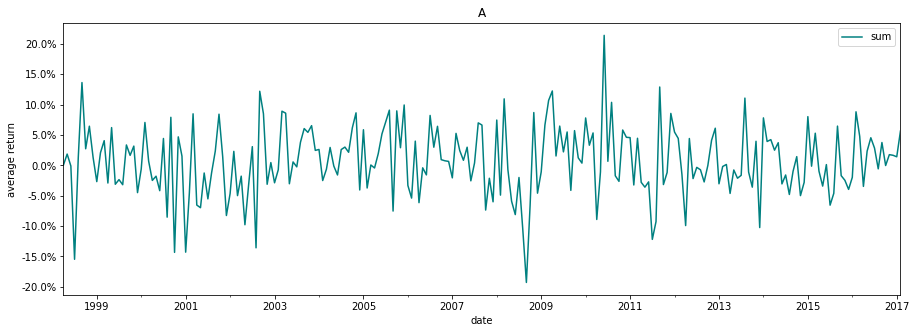

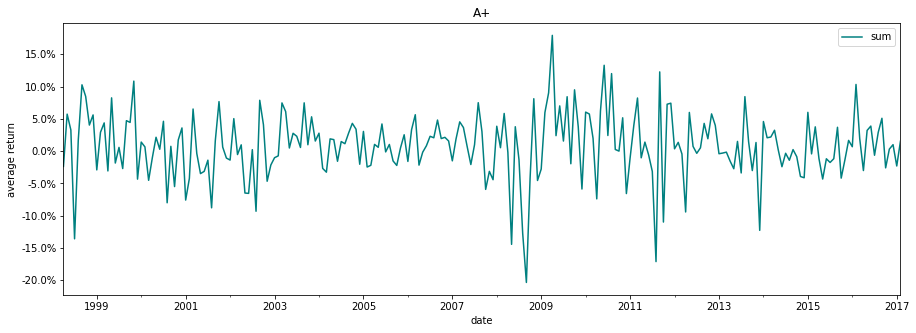

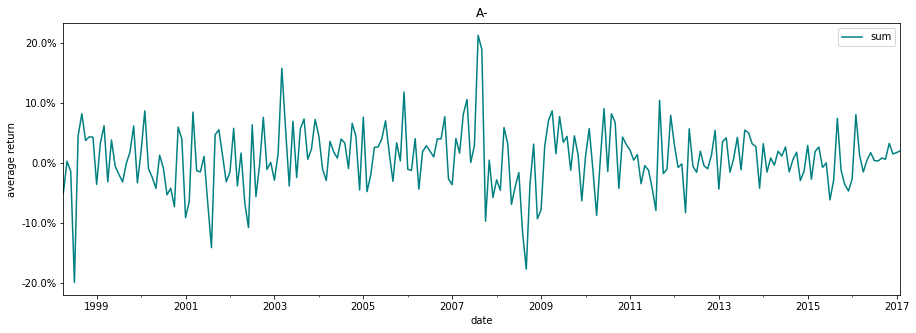

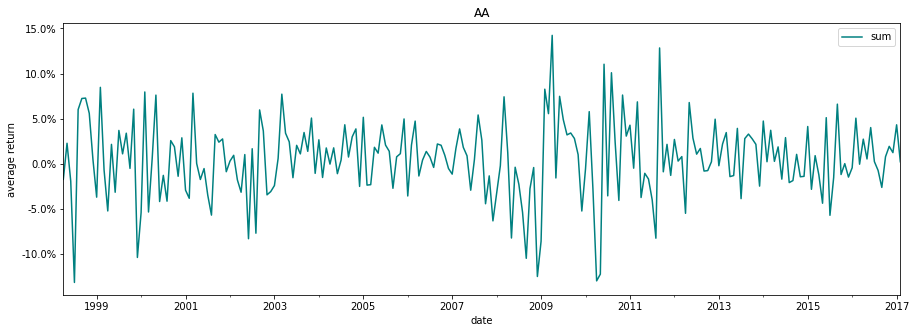

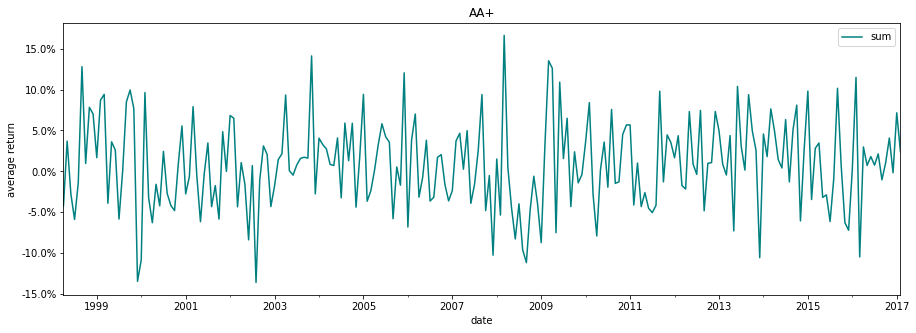

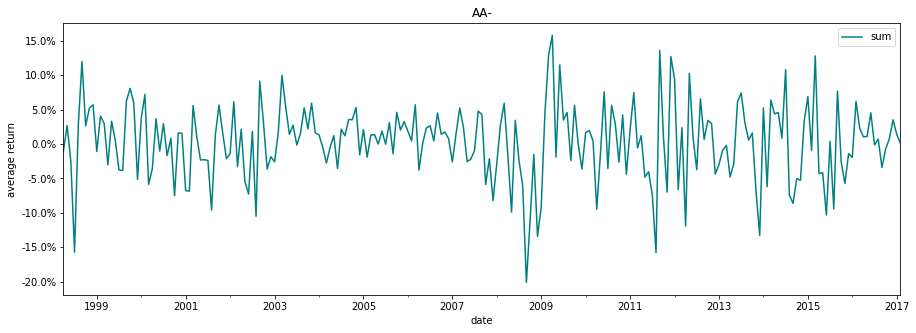

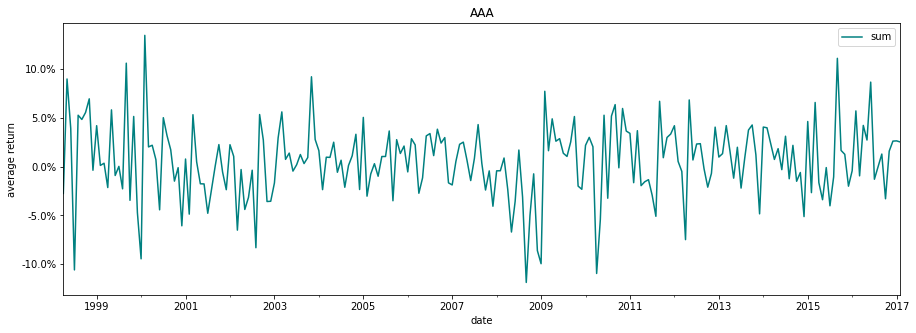

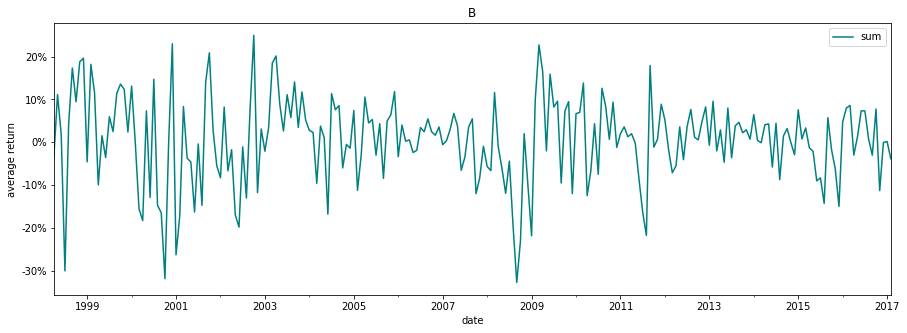

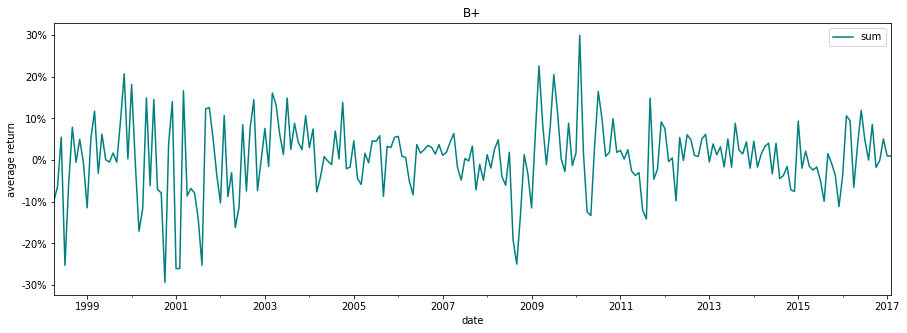

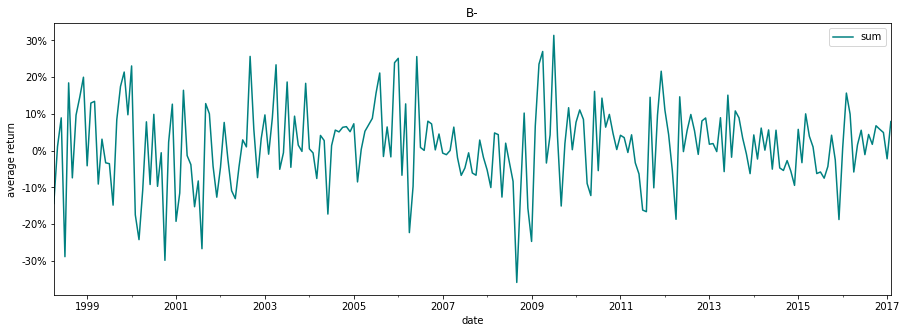

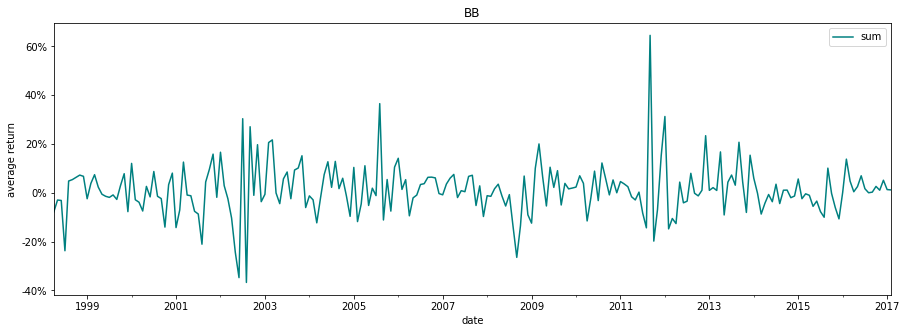

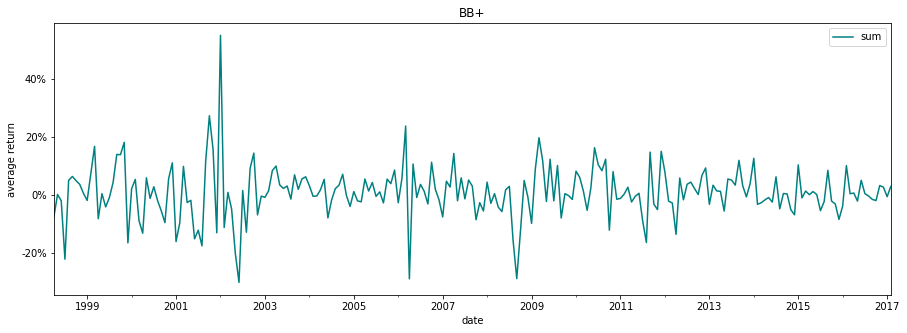

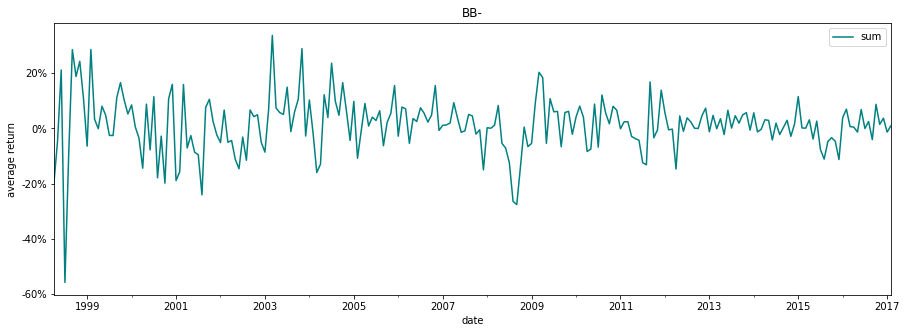

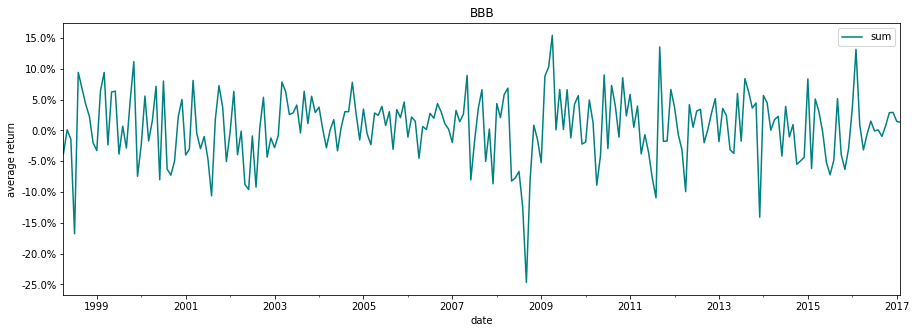

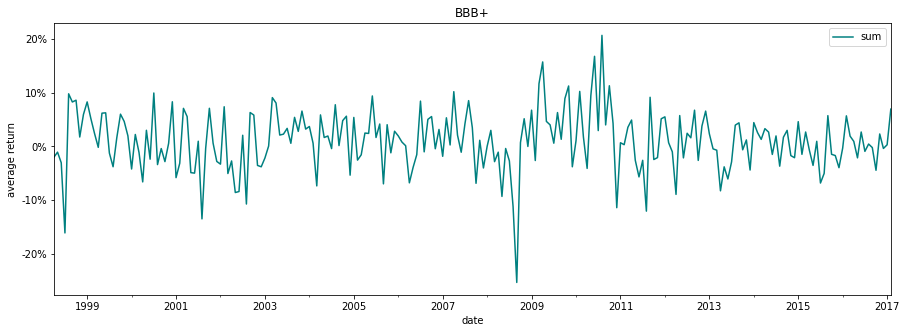

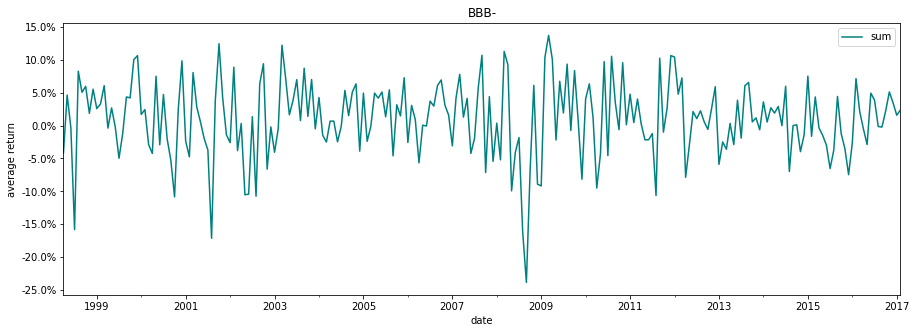

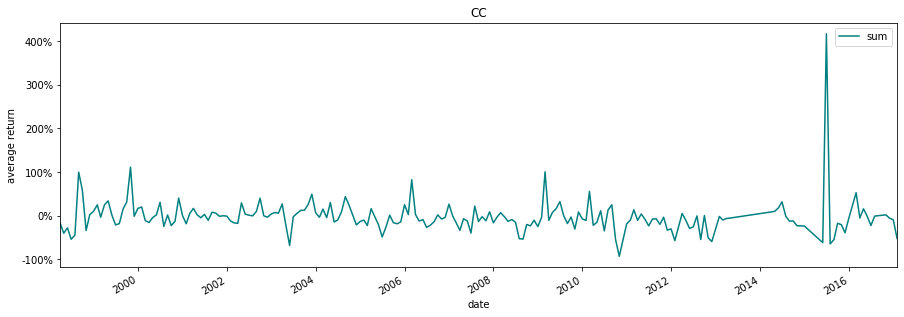

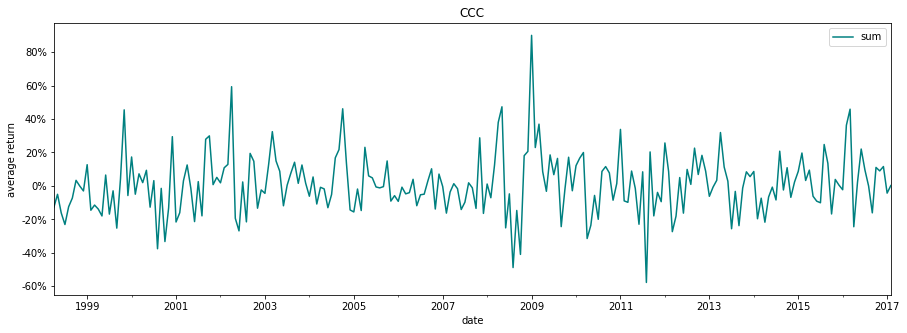

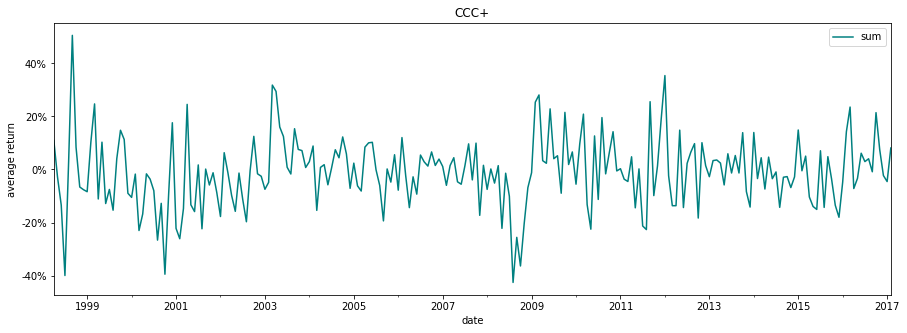

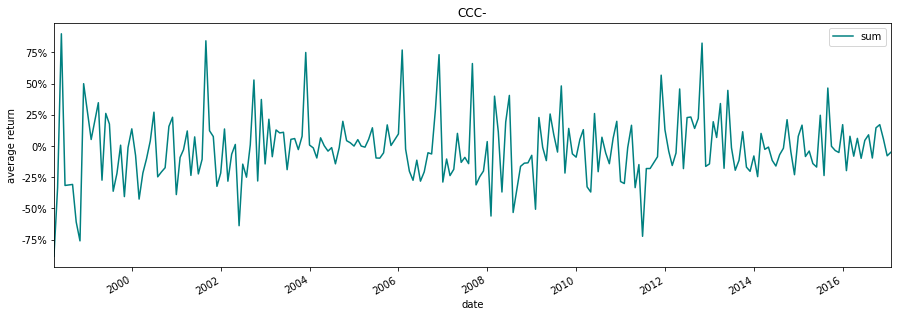

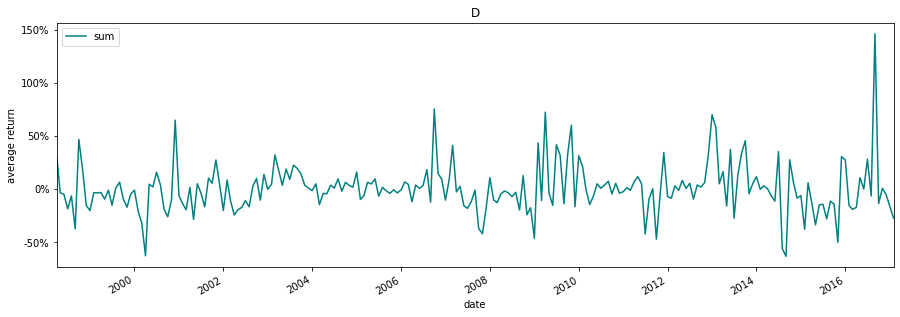

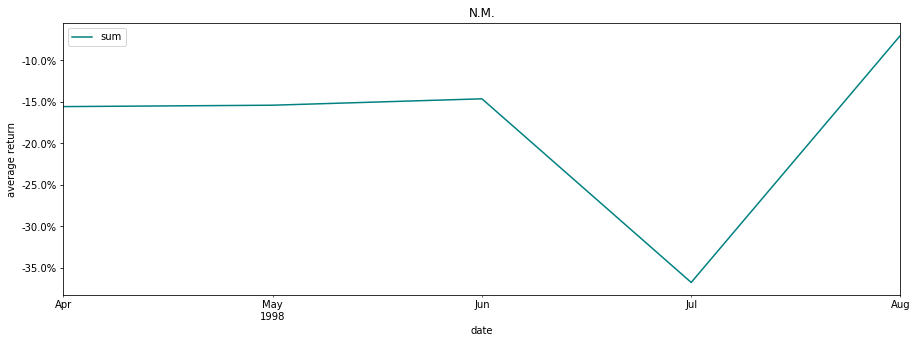

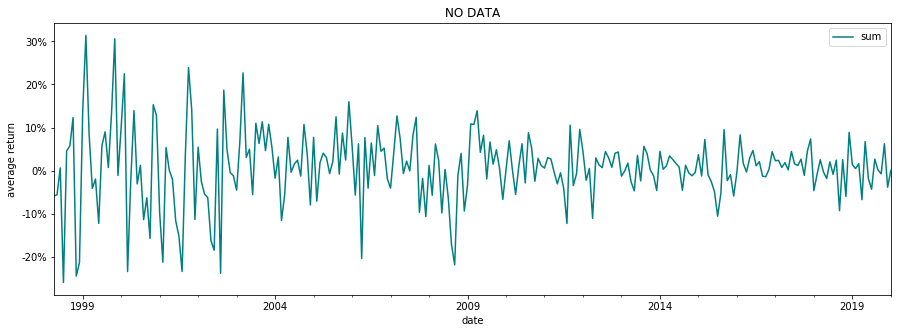

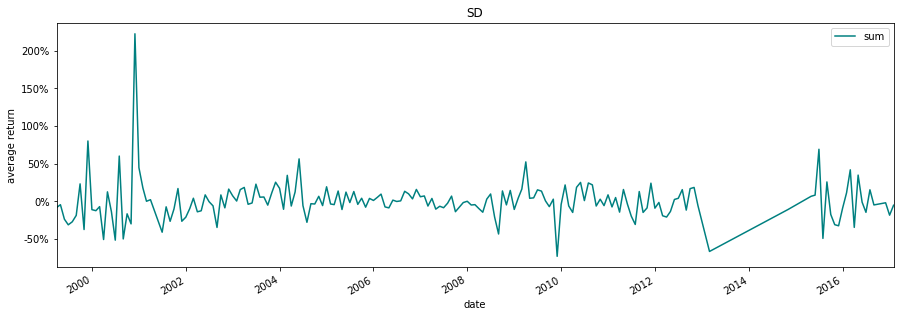

In [20]:
for i in rate_list:
#     plt.figure(figsize=(10,10))
    mask = grouped['rating'] == i
    ax = grouped[mask].plot(x = 'date', y = 'sum', title = i, color = 'teal', figsize = (15,5))
    plt.ylabel('average return')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()
    


<Figure size 720x360 with 0 Axes>

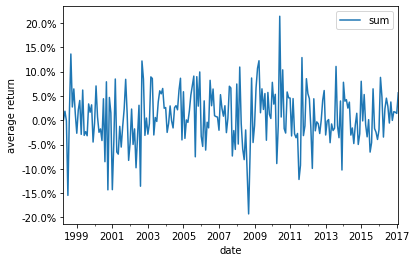

In [21]:
plt.figure(figsize=(10,5))
mask = grouped['rating'] == 'A'

ax = grouped[mask].plot(x = 'date', y = 'sum')
plt.ylabel('average return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

# df.plot(x="R", y=["F10.7", "Dst"], style='.')

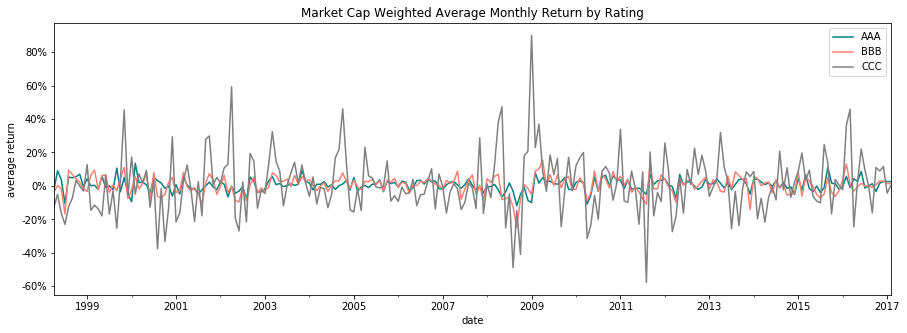

In [22]:
# for i in ['AAA','BBB','CCC']:
mask = grouped['rating'] == 'AAA'
df_AAA = grouped[mask]
ax=df_AAA.plot(x = 'date', y = 'sum', title = 'Market Cap Weighted Average Monthly Return by Rating', color = 'teal', figsize = (15,5), label = 'AAA')

mask = grouped['rating'] == 'BBB'
df_BBB = grouped[mask]
df_BBB.plot(x = 'date', y = 'sum', title = 'Market Cap Weighted Average Monthly Return by Rating', color = 'salmon', ax=ax, label = 'BBB') 


mask = grouped['rating'] == 'CCC'
df_BBB = grouped[mask]
df_BBB.plot(x = 'date', y = 'sum', title = 'Market Cap Weighted Average Monthly Return by Rating', color = 'grey', ax=ax, label = 'CCC') 

# ax = grouped[mask].plot(x = 'date', y = 'sum', title = i, color = 'teal', figsize = (15,5))
# plt.ylabel('average return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('average return')
# #     plt.show()
# ax = df1.plot()
# df2.plot(ax=ax)
plt.show()
    

In [23]:
grouped.groupby('rating')[['sum','count']].sum()

,sum,count
rating,,
A,148.420816,30701
A+,176.609316,19292
A-,170.494614,32778
AA,113.165886,5751
AA+,194.179157,1306
AA-,63.984264,11693
AAA,130.419012,3655
B,125.946989,23871
B+,132.009006,35259


In [24]:
year_1998_2017 = grouped.groupby('rating')[['sum']].mean()
year_1998_2017
print('average return difference between AAA and CCC from 1998 to 2017:', float(year_1998_2017.T['AAA'] - year_1998_2017.T['CCC']),'percent')
year_1998_2017

average return difference between AAA and CCC from 1998 to 2017: -0.4044288085420157 percent


,sum
rating,
A,0.653836
A+,0.778015
A-,0.751078
AA,0.498528
AA+,0.855415
AA-,0.281869
AAA,0.574533
B,0.554833
B+,0.581537


In [25]:
mask = grouped['year'] <= 2008
year_1998_2008 = grouped[mask].groupby('rating')[['sum']].mean()
print('average return difference between AAA and CCC from 1998 to 2008:', float(year_1998_2008.T['AAA'] - year_1998_2008.T['CCC']),'percent')


average return difference between AAA and CCC from 1998 to 2008: 0.5790305084151861 percent


In [26]:
mask = grouped['year'] > 2008
grouped[mask].groupby('rating')[['sum']].mean()
year_2008_2017 = grouped[mask].groupby('rating')[['sum']].mean()
print('average return difference between AAA and CCC from 2008 to 2017:', float(year_2008_2017.T['AAA'] - year_2008_2017.T['CCC']),'percent')


average return difference between AAA and CCC from 2008 to 2017: -1.6989823992305773 percent


In [27]:
grouped

,rating,year,month,date,sum,count
0,A,1998,4,1998-04-01,0.049914,172
1,A,1998,5,1998-05-01,1.849327,169
2,A,1998,6,1998-06-01,-0.111610,172
3,A,1998,7,1998-07-01,-15.461932,168
4,A,1998,8,1998-08-01,1.246638,165
...,...,...,...,...,...,...
5189,SD,2016,8,2016-08-01,15.237847,5
5190,SD,2016,9,2016-09-01,-4.874609,4
5191,SD,2016,12,2016-12-01,-2.004700,1
5192,SD,2017,1,2017-01-01,-18.461500,1
